## Reading in Data & Importing Lib

### Set up Dir

In [1]:
import sys, os
if 'google.colab' in sys.modules:

    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/School stuff/Y4 S1/DSA4264'

    # move to Google Drive directory
    os.chdir(path_to_file)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Downloads

In [2]:
%pip install bertopic

### Import Lib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go

from transformers import AutoTokenizer
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from plotly.subplots import make_subplots
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

### Read in Data

In [ ]:
Data1 = pd.read_csv('../data/Data_1.csv', engine = 'python') 
Data2 = pd.read_csv('../data/Data_2.csv', engine = 'python')
Data3 = pd.read_csv('../data/Data_3.csv', engine = 'python')
Data4 = pd.read_csv('../data/Data_4.csv', engine = 'python')
Data5 = pd.read_csv('../data/Data_5.csv', engine = 'python')
Data6 = pd.read_csv('../data/Data_6.csv', engine = 'python')
Data7 = pd.read_csv('../data/Data_7.csv', engine = 'python')

In [ ]:
Deleted = pd.read_csv('../data/Deleted_comments.csv', engine = 'python')

In [ ]:
SGHappenings = pd.read_csv('../data/SGHappenings.csv', engine = 'python')
SG = pd.read_csv('../data/SG.csv', engine = 'python')
SGRaw = pd.read_csv('../data/SGRaw.csv', engine = 'python')

### Merge Data

In [7]:
Data = pd.concat([Data1, Data2, Data3, Data4, Data5, Data6, Data7], ignore_index=True, axis=0)

Data = Data.drop(columns=['Unnamed: 0'])

In [8]:
del Data1, Data2, Data3, Data4, Data5, Data6, Data7

### Datatypes

In [9]:
Data['timestamp']= pd.to_datetime(Data['timestamp'])
Data['post_timestamp']= pd.to_datetime(Data['timestamp'])

## Data

In [10]:
# Merge the BERT Topics together
topics = pd.concat([SG, SGHappenings, SGRaw], ignore_index = True, axis =0)

# Perform a left join on 'post_title' column
Data = Data.merge(topics, on='post_title', how='left')

In [11]:
Data

,text,timestamp,username,link,link_id,parent_id,text_id,subreddit_id,moderation,BERT_2_hate,...,post_title,author,author_id,comment_count,vote_score,post_title_cleaned,rake_keywords,topic,topic_probability,topic_words
0,STI chiong ah,2020-05-14 12:35:30,iamabear1,/r/singapore/comments/gjjem5/covid19_8663_busi...,t3_gjjem5,t3_gjjem5,fqljinp,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",True,...,"Covid-19: 8,663 businesses in S'pore closed do...",Not Found,Not Found,4.0,30.0,covid businesses in closed down in april hi...,"['covid businesses', 'april highest', 'years',...",-1.0,0.000000,man spore singapore covid19
1,Look on the bright side - you'll never make th...,2020-02-09 17:23:24,lkc159,/r/singapore/comments/f15aks/did_i_just_get_sc...,t3_f15aks,t3_f15aks,fh3hl0g,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,...,Did I just get scammed,Not Found,Not Found,42.0,50.0,did i just get scammed,['get scammed'],33.0,0.751121,scam new scam legit scammers
2,"For posts flaired as such (by OP), we will be ...",2021-04-06 18:08:59,AutoModerator,/r/singapore/comments/maajuo/a_compilation_of_...,t3_maajuo,t3_maajuo,gtlh5uf,t5_2qh8c,"{'collapsed_reason': None, 'author_is_blocked'...",True,...,A compilation of mental health/wellness resour...,Not Found,Not Found,45.0,301.0,a compilation of mental healthwellness resourc...,"['mental healthwellness resources', 'please ad...",40.0,1.000000,mental mental health health mental healthcare
3,sounds q fucked up if no concern for each othe...,2021-01-22 14:22:42,[deleted],/r/singapore/comments/l28wfr/rsingapore_random...,t3_l28wfr,t1_gk6fcys,gk6gc0y,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",True,...,/r/singapore random discussion and small quest...,AutoModerator,t2_6l4z3,2270.0,13.0,r random discussion and small questions thread...,"['small questions thread', 'r random discussio...",NaN,NaN,NaN
4,Chinese media reported a while ago: https://ww...,2020-03-26 04:51:22,localinfluenza,/r/singapore/comments/fp5hgu/pcf_cluster_anoth...,t3_fp5hgu,t3_fp5hgu,flj42mf,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",False,...,PCF Cluster: Another teacher diagnosed with Co...,Not Found,Not Found,21.0,9.0,pcf cluster another teacher diagnosed with cov...,"['pcf cluster another teacher diagnosed', 'fee...",-1.0,0.000000,man spore singapore covid19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021678,Its fuckin hot rn,2022-05-25 04:22:50,Mahsunon,/r/singapore/comments/ux28gq/rsingapore_random...,t3_ux28gq,t1_i9waspv,i9wb51x,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",True,...,/r/singapore random discussion and small quest...,AutoModerator,t2_6l4z3,969.0,8.0,r random discussion and small questions thread...,"['small questions thread', 'r random discussio...",NaN,NaN,NaN
5021679,"hey, sending hugs your way &lt;3",2022-09-29 14:05:32,_0_o,/r/singapore/comments/xqprla/rsingapore_random...,t3_xqprla,t1_iqcvjsd,iqd9twj,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",False,...,/r/singapore random discussion and small quest...,AutoModerator,t2_6l4z3,437.0,9.0,r random discussion and small questions thread...,"['small questions thread', 'r random discussio...",NaN,NaN,NaN
5021680,Depends in the speed they got caught doing. In...,2023-03-27 01:00:34,dodgethis_sg,/r/singapore/comments/1235s44/eli5_why_do_the_...,t3_1235s44,t3_1235s44,jdtcn3x,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",False,...,[ELI5] Why do the traffic police let offenders...,Not Found,Not Found,26.0,0.0,eli why do the traffic police let offenders go...,"['traffic police let offenders go without', 'e...",-1.0,0.000000,man spore singapore covid19
5021681,Maybe I should have typed ‘doesn’t change too ...,2023-04-29 04:43:31,ShadeX8,/r/singapore/comments/130dj90/latest_property_...,t3_130dj90,t1_ji5arfa,ji5d2nc,t5_2qh8c,"{'banned_at_utc': None, 'mod_reason_by': None,...",False,...,Latest property cooling measu

## Deleted Comments

In [12]:
subreddit_name = pd.DataFrame({
    'sub_id': ['t5_2qh8c', 't5_xnx04', 't5_70s6ew'],
    'subreddit': ['r/Singapore', 'r/SingaporeRaw', 'r/SingaporeHappenings']
})

Deleted = Deleted.merge(subreddit_name, left_on='subreddit_id', right_on='sub_id', how='left')
Deleted = Deleted.drop(columns=['sub_id', 'post_timestamp'])

Deleted

,Unnamed: 0,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,subreddit
0,12,[deleted],2021-09-01 05:34:23,[deleted],/r/singapore/comments/pffwz6/rsingapore_random...,t3_pffwz6,t1_hb5k2e9,hb5kcnw,t5_2qh8c,"{'collapsed_reason_code': 'DELETED', 'collapse...",r/Singapore
1,19,[deleted],2021-09-17 09:48:23,[deleted],/r/singapore/comments/ppt36p/do_you_think_sing...,t3_ppt36p,t1_hd67fkz,hd6t3b2,t5_2qh8c,"{'collapsed_reason_code': 'DELETED', 'collapse...",r/Singapore
2,22,[deleted],2021-07-15 12:28:24,[deleted],/r/singapore/comments/okneyh/watch_out_kumar_y...,t3_okneyh,t1_h592nmq,h59n91z,t5_2qh8c,"{'collapsed_reason_code': 'DELETED', 'collapse...",r/Singapore
3,32,[deleted],2021-10-29 03:23:53,[deleted],/r/singapore/comments/qhy78q/what_are_we_doing...,t3_qhy78q,t1_hig6c8h,higwgl0,t5_2qh8c,"{'collapsed_reason_code': 'DELETED', 'collapse...",r/Singapore
4,46,[deleted],2020-09-18 09:24:49,[deleted],/r/singapore/comments/iv0o7i/onemap_30_is_a_pr...,t3_iv0o7i,t3_iv0o7i,g5oqc6v,t5_2qh8c,"{'removal_reason': None, 'collapsed': True, 'c...",r/Singapore
...,...,...,...,...,...,...,...,...,...,...,...
333159,4932676,[deleted],2022-05-18 15:33:13,[deleted],/r/singapore/comments/uscjq8/social_media_acco...,t3_uscjq8,t3_uscjq8,i931qay,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",r/Singapore
333160,4932683,[deleted],2023-02-14 07:10:41,[deleted],/r/singapore/comments/111wfz5/live_coverage_bu...,t3_111wfz5,t1_j8h5h3e,j8h5pk8,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",r/Singapore
333161,4932689,[deleted],2022-03-31 05:15:23,[deleted],/r/singapore/comments/tskfnk/rsingapore_random...,t3_tskfnk,t1_i2stkox,i2t9p6d,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",r/Singapore
333162,4932698,[deleted],2022-01-31 07:10:23,[deleted],/r/singapore/comments/sgtxww/iris_koh_remanded...,t3_sgtxww,t1_huynfui,huysero,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",r/Singapore


<Figure size 1400x800 with 0 Axes>

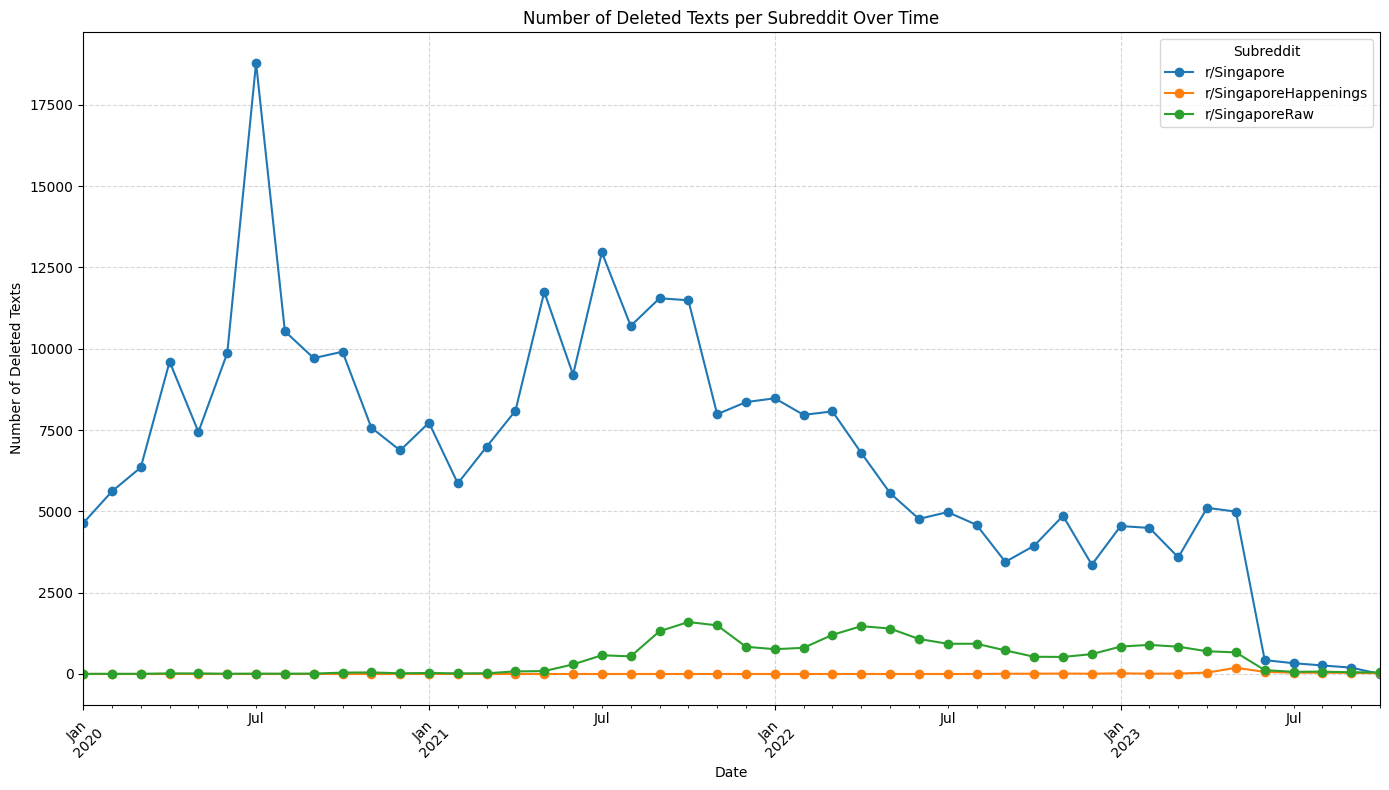

In [13]:
# Convert 'timestamp' to datetime if it's not already
Deleted['timestamp'] = pd.to_datetime(Deleted['timestamp'])

# Extract for Monthly aggregation
Deleted['date'] = Deleted['timestamp'].dt.to_period('M')

# Group by subreddit and date to count the number of deleted texts in each period
deleted_counts = Deleted.groupby(['subreddit', 'date']).size().reset_index(name='count')

# Pivot to have each subreddit as a separate column for easier plotting
deleted_counts_pivot = deleted_counts.pivot(index='date', columns='subreddit', values='count').fillna(0)

# Plot time series
plt.figure(figsize=(14, 8))
deleted_counts_pivot.plot(kind='line', marker='o', figsize=(14, 8))

plt.title("Number of Deleted Texts per Subreddit Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Deleted Texts")
plt.legend(title="Subreddit")
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Subreddit Rules

|r/Singapore|r/SingaporeRaw|r/SingaporeHappenings|
|-----|-----|-----|
|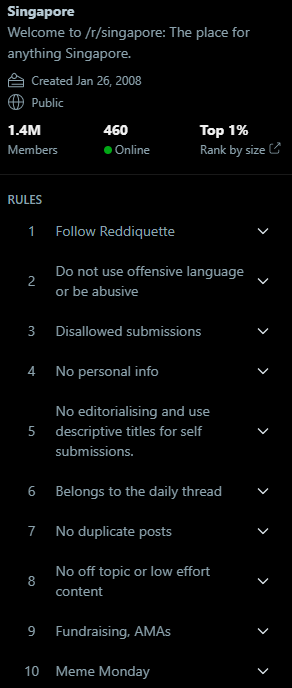|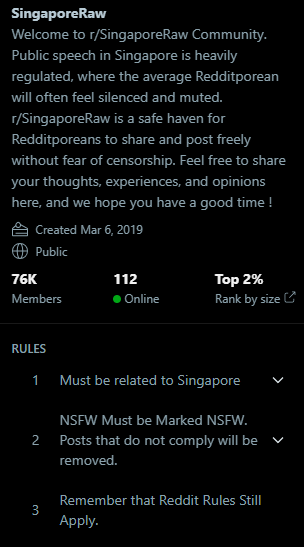|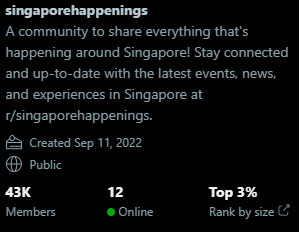|

## General Overview


In [19]:
subreddit = Data.groupby('subreddit').agg(
    total_post=('link_id', 'nunique'),
    total_text=('text', 'count'),
    total_hate=('BERT_2_hate', 'sum')
).reset_index()

subreddit['text_per_post'] = subreddit['total_text']/subreddit['total_post']
subreddit['hate_per_text'] = subreddit['total_hate']/subreddit['total_text']
subreddit['hate_per_post'] = subreddit['total_hate']/subreddit['total_post']
subreddit = subreddit.sort_values(by='total_text', ascending=False)

subreddit

,subreddit,total_post,total_text,total_hate,text_per_post,hate_per_text,hate_per_post
0,r/Singapore,86241,4399555,1483011,51.014657,0.337082,17.196125
2,r/SingaporeRaw,18482,556322,258478,30.100747,0.464619,13.985391
1,r/SingaporeHappenings,1289,60163,31103,46.674166,0.516979,24.129558


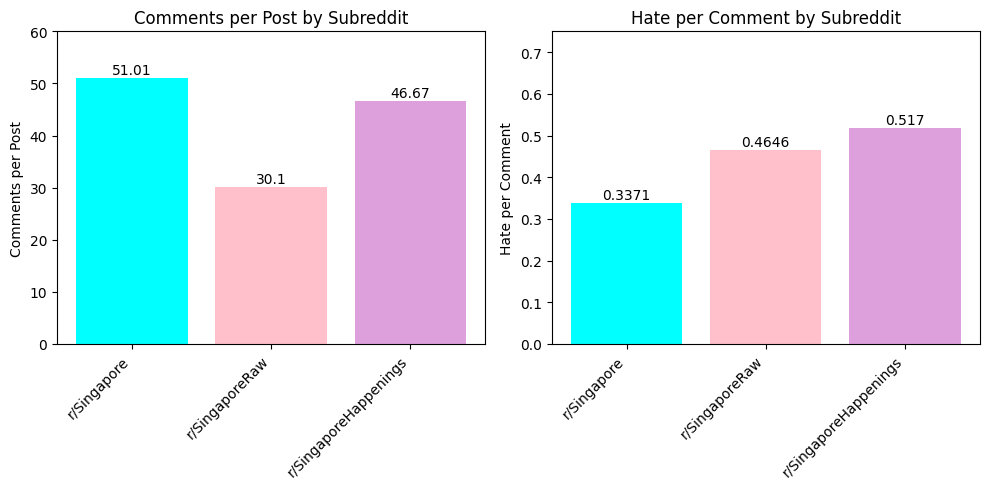

In [20]:
subreddit_names = subreddit['subreddit'].tolist()
text_per_post = subreddit['text_per_post'].tolist()
hate_per_text = subreddit['hate_per_text'].tolist()
hate_per_post = subreddit['hate_per_post'].tolist()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # two subplots

# Define colors for each subreddit
colors = ['cyan', 'pink', 'plum']

# Plot text_per_post
x = np.arange(len(subreddit_names))
axs[0].bar(x, text_per_post, color=colors)
axs[0].set_xticks(x)
axs[0].set_xticklabels(subreddit_names, rotation=45, ha='right')
axs[0].set_ylabel('Comments per Post')
axs[0].set_title('Comments per Post by Subreddit')
axs[0].set_ylim(0, 60)
axs[0].grid(False)  # Turn off the grid

for i, v in enumerate(text_per_post):
    axs[0].text(i, v + 0.75, str(round(v, 2)), ha='center')

# Plot hate_per_text
axs[1].bar(x, hate_per_text, color=colors)
axs[1].set_xticks(x)
axs[1].set_xticklabels(subreddit_names, rotation=45, ha='right')
axs[1].set_ylabel('Hate per Comment')
axs[1].set_title('Hate per Comment by Subreddit')
axs[1].set_ylim(0, 0.75)
axs[1].grid(False)  # Turn off the grid

for i, v in enumerate(hate_per_text):
    axs[1].text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.tight_layout()
plt.show()


### Diving into the Commonly discussed Topics in each Subreddit

Defined as taking total no. of comments using Reddit API

In [21]:
# Ensure 'comment_count' is numeric for sorting
Data['comment_count'] = pd.to_numeric(Data['comment_count'], errors='coerce').fillna(0)

# Filter out posts in r/Singapore where the title starts with the unwanted phrase
filtered_data = Data[~((Data['subreddit'] == 'r/Singapore') &
                       (Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for', na=False)))]

# Drop duplicate post titles within each subreddit
unique_titles = filtered_data.drop_duplicates(subset=['subreddit', 'post_title'])

# Sort by subreddit and comment_count in descending order
unique_titles = unique_titles.sort_values(['subreddit', 'comment_count'], ascending=[True, False])

# Get the top 100 unique post titles for each subreddit
top_100_unique_posts = unique_titles.groupby('subreddit').head(100)

# Display the result
top_100_unique_posts[['subreddit', 'post_title', 'comment_count', 'topic_words']]

,subreddit,post_title,comment_count,topic_words
1088,r/Singapore,Singapore General Elections 2020 Polling Resul...,9378.0,man spore singapore covid19
456,r/Singapore,Level system trial 2,3904.0,man spore singapore covid19
1031,r/Singapore,"No dining in, social group sizes cut to 2 from...",1618.0,dining eateries pax groups
256,r/Singapore,"No dining in, social gatherings capped at 2 pe...",1523.0,social gatherings gatherings cap social diningin
82756,r/Singapore,What's the most fucked up thing that happened ...,1258.0,teachers teacher school teachers bad teachers
...,...,...,...,...
2889952,r/SingaporeRaw,Whose stupid idea was it to get old folks to u...,198.0,dbs digital ocbc banking
2899723,r/SingaporeRaw,"Over 60 per cent of Singaporeans, Malaysians c...",197.0,man spore singapore covid19
2912369,r/SingaporeRaw,Fish Curry.,197.0,singapore like new man
32435,r/SingaporeRaw,Reservist is a bigger problem than 2 years NS,196.0,ns reservist nsfs ns supporters


In [22]:
singapore_posts = top_100_unique_posts[top_100_unique_posts['subreddit'] == 'r/Singapore']
singapore_posts['topic_words'].value_counts().head(10)

,count
topic_words,
man spore singapore covid19,30
lgbtq lgbt gay transgender,4
pritam raeesah pritam singh singh,4
racism racist racial racism singapore,3
pm lee pm lee hsien loong,3
live discussion constituency political 2020 july political broadcasts,3
nicole nicole seah seah leon,3
dining eateries pax groups,2
election elections singapore general presidential,2


In [23]:
singapore_posts = top_100_unique_posts[top_100_unique_posts['subreddit'] == 'r/SingaporeRaw']
singapore_posts['topic_words'].value_counts().head(10)

,count
topic_words,
singapore like new man,33
penalty death penalty death drug,6
china chinese singaporean chinese taiwan,5
singapore singapore singapore singaporeans singaporean,5
sg sg sg sgs sgd,4
men women singaporean girls,4
racist racism minorities racial,3
man spore singapore covid19,3
teachers teacher schools school,2


In [24]:
singapore_posts = top_100_unique_posts[top_100_unique_posts['subreddit'] == 'r/SingaporeHappenings']
singapore_posts['topic_words'].value_counts().head(10)

,count
topic_words,
man singapore woman police,97
conflict gaza israelhamas israel,2
man spore singapore covid19,1


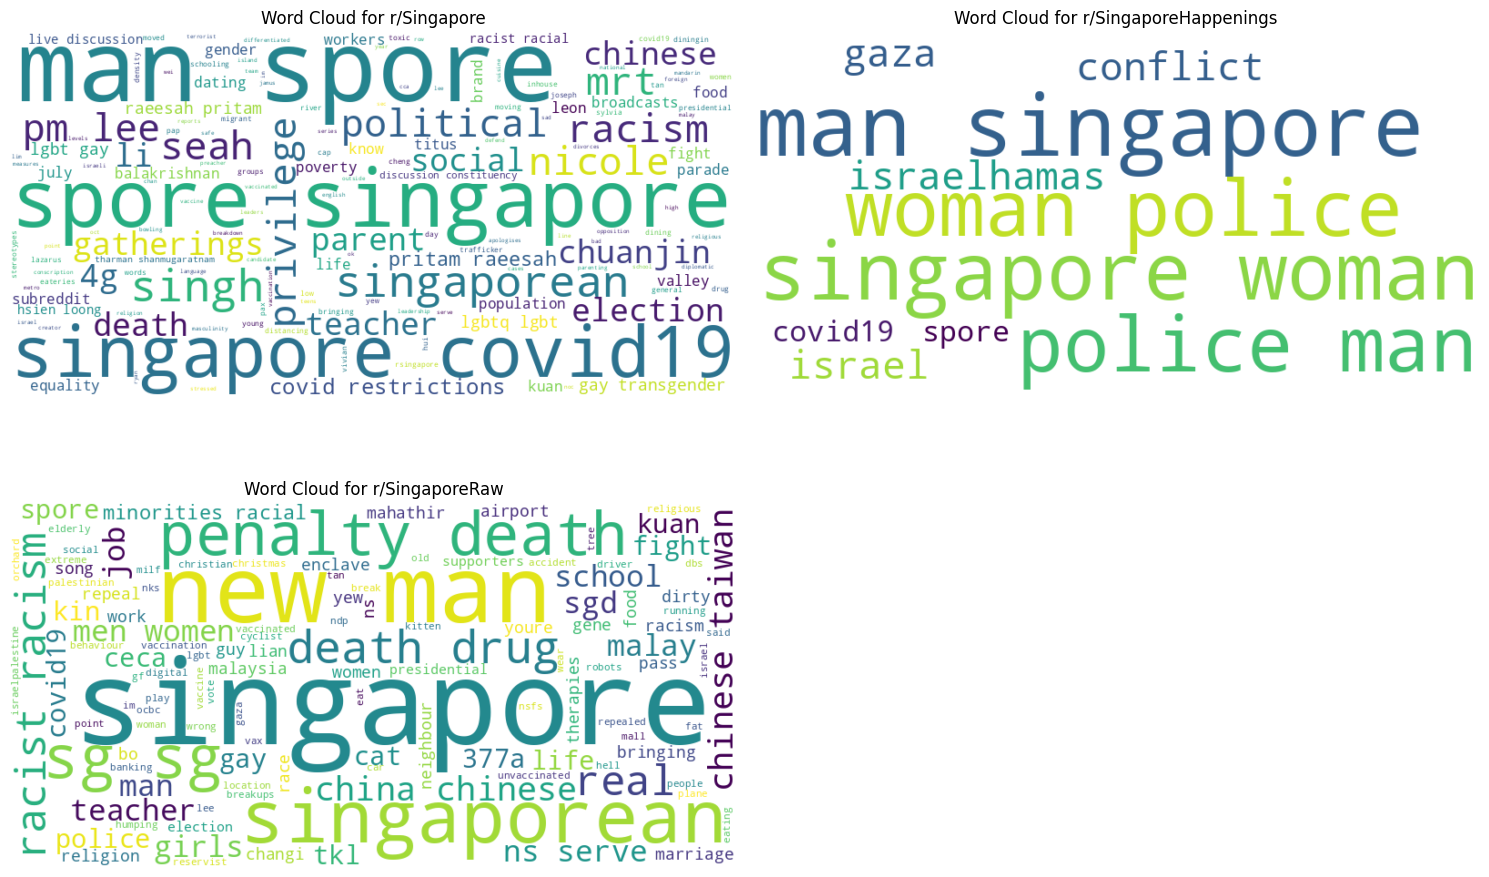

In [25]:
# Group by subreddit and aggregate all topics for that subreddit
subreddit_keywords = top_100_unique_posts.groupby('subreddit')['topic_words'].apply(lambda x: ' '.join(x)).reset_index()

# Set up the figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each subreddit to create a wordcloud
for i, row in subreddit_keywords.iterrows():
    subreddit = row['subreddit']
    keywords = row['topic_words']

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)

    # Plotting the wordcloud
    plt.subplot(2, 2, i + 1)  # Adjust this according to the number of subreddits
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(f"Word Cloud for {subreddit}")

# Adjust layout and display the word clouds
plt.tight_layout()
plt.show()


## Time Series Plots of Posts and Comments

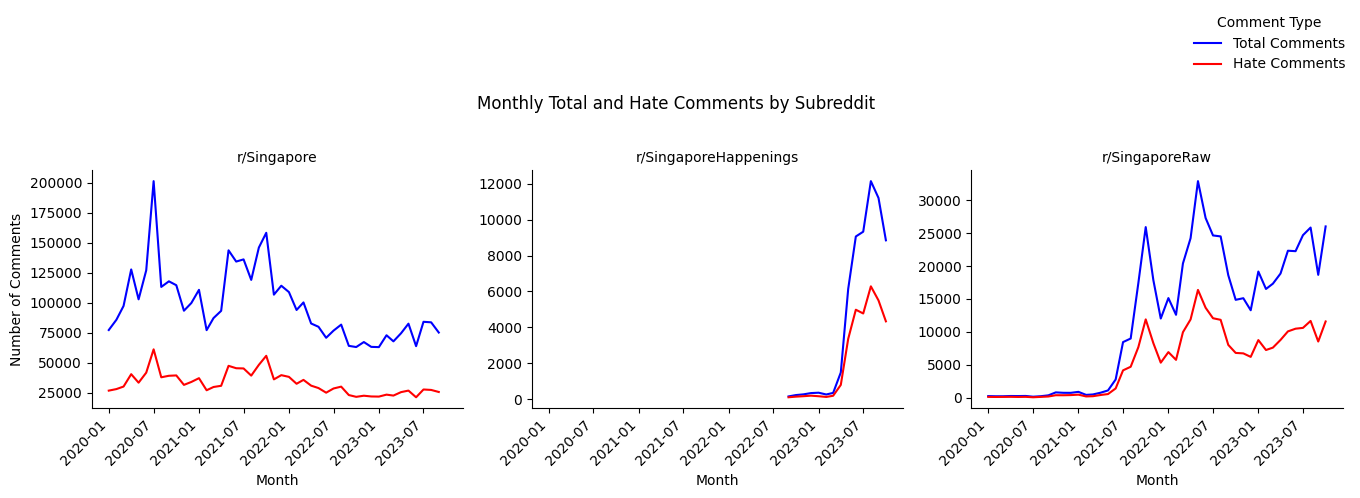

In [26]:
# Create a month column
Data['month'] = Data['timestamp'].dt.to_period('M')

# Count total comments
total_comments_counts = Data.groupby(['subreddit', 'month']).size().reset_index(name='total_comments')

# Filter for hate comments and count
hate_comments_counts = Data[Data['BERT_2_hate'] == True].groupby(['subreddit', 'month']).size().reset_index(name='hate_comments')

# Merge the two DataFrames on subreddit and month
monthly_counts = pd.merge(total_comments_counts, hate_comments_counts, on=['subreddit', 'month'], how='left')

# Fill NaN values in hate_comments with 0 (for subreddits with no hate comments)
monthly_counts['hate_comments'] = monthly_counts['hate_comments'].fillna(0)

# Convert the month back to datetime for plotting purposes
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

# Set up the Seaborn FacetGrid for plotting side by side
g = sns.FacetGrid(monthly_counts, col="subreddit", height=4, sharey=False, despine=True)  # Set despine=True to remove gridlines

# Map the lineplot onto the grid for total comments
g.map_dataframe(sns.lineplot, x='month', y='total_comments', label='Total Comments', color='blue')

# Map the lineplot onto the grid for hate comments
g.map_dataframe(sns.lineplot, x='month', y='hate_comments', label='Hate Comments', color='red')

# Add the legend in the top right corner
g.add_legend(title='Comment Type', bbox_to_anchor=(1, 1.25), loc='upper right')

# Set axis labels and title
g.set_axis_labels("Month", "Number of Comments")
g.set_titles("{col_name}")
g.fig.suptitle("Monthly Total and Hate Comments by Subreddit", y=1.02)

# Rotate x-axis labels for each subplot
for ax in g.axes.flat:
    ax.grid(False)  # Turn off grid lines for each subplot
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()


### Diving into the reasons for the Spikes in r/Singapore

In [27]:
# Ensure 'timestamp' is a datetime type
Data['timestamp'] = pd.to_datetime(Data['timestamp'])

# Filter data for subreddit "r/Singapore" and July 2020
filtered_data = Data[
    (Data['subreddit'] == "r/Singapore") &
    (Data['timestamp'].dt.month == 7) &
    (Data['timestamp'].dt.year == 2020)
]

# Remove entries where 'post_title' starts with the specified string
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith("/r/singapore random discussion and small")]

# Get unique post_titles
filtered_data_unique = filtered_data.drop_duplicates(subset='post_title')

# Sort the resulting data by 'comment_count' in descending order
filtered_data_unique = filtered_data_unique.sort_values(by='comment_count', ascending=False)

filtered_data_unique['topic_words'].value_counts().head(10)

,count
topic_words,
man spore singapore covid19,1736
pap paps opposition candidate,165
polling election voting vote,141
pritam raeesah pritam singh singh,75
ge ge2020 ge 2020 ge2020 ge2020,69
election elections singapore general presidential,52
jamus jamus lim lim cockles,35
charles charles yeo yeo imran,30
party workers party opposition opposition party,29


In [28]:
# Ensure 'timestamp' is a datetime type
Data['timestamp'] = pd.to_datetime(Data['timestamp'])

# Filter data for subreddit "r/Singapore" and July 2020
filtered_data = Data[
    (Data['subreddit'] == "r/Singapore") &
    (Data['timestamp'].dt.month == 5) &
    (Data['timestamp'].dt.year == 2021)
]

# Remove entries where 'post_title' starts with the specified string
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith("/r/singapore random discussion and small")]

# Get unique post_titles
filtered_data_unique = filtered_data.drop_duplicates(subset='post_title')

# Sort the resulting data by 'comment_count' in descending order
filtered_data_unique = filtered_data_unique.sort_values(by='comment_count', ascending=False)

filtered_data_unique['topic_words'].value_counts().head(10)

,count
topic_words,
man spore singapore covid19,1162
sph sph media media circulation,38
covid covid19 singapore covid19 covid19 pandemic,37
masks mask wear wearing,29
vaccine covid19 vaccine vaccinated vaccination,28
changi airport airport changi linked changi,28
sunset clouds sunrise sky,23
covid restrictions covid19 covid restrictions,20
gym gyms fitness anytime fitness,20


In [29]:
# Ensure 'timestamp' is a datetime type
Data['timestamp'] = pd.to_datetime(Data['timestamp'])

# Filter data for subreddit "r/Singapore" and July 2020
filtered_data = Data[
    (Data['subreddit'] == "r/Singapore") &
    (Data['timestamp'].dt.month == 10) &
    (Data['timestamp'].dt.year == 2021)
]

# Remove entries where 'post_title' starts with the specified string
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith("/r/singapore random discussion and small")]

# Get unique post_titles
filtered_data_unique = filtered_data.drop_duplicates(subset='post_title')

# Sort the resulting data by 'comment_count' in descending order
filtered_data_unique = filtered_data_unique.sort_values(by='comment_count', ascending=False)

filtered_data_unique['topic_words'].value_counts().head(10)

,count
topic_words,
man spore singapore covid19,909
noc sylvia ryan sylvia chan,41
covid covid19 singapore covid19 covid19 pandemic,29
covid restrictions covid19 covid restrictions,29
deaths deaths singapore cases deaths singapore reports,28
vaccine covid19 vaccine vaccinated vaccination,27
vtl land vtl vtls land,13
sunset clouds sunrise sky,13
masks mask wear wearing,11


In [30]:
# Ensure 'timestamp' is a datetime type
Data['timestamp'] = pd.to_datetime(Data['timestamp'])

# Filter data for subreddit "r/Singapore" and July 2020
filtered_data = Data[
    (Data['subreddit'] == "r/SingaporeHappenings") &
    (Data['timestamp'].dt.month == 8) &
    (Data['timestamp'].dt.year == 2023)
]

# Remove entries where 'post_title' starts with the specified string
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith("/r/singapore random discussion and small")]

# Get unique post_titles
filtered_data_unique = filtered_data.drop_duplicates(subset='post_title')

# Sort the resulting data by 'comment_count' in descending order
filtered_data_unique = filtered_data_unique.sort_values(by='comment_count', ascending=False)

filtered_data_unique['topic_words'].value_counts().head(10)

,count
topic_words,
man singapore woman police,252
man spore singapore covid19,5
kinderland abuse cases alleged abuse preschool,1
lgbtq lgbt gay transgender,1
psp psps kala kala manickam,1
seized cnb suspected drug drug,1
removed edmw mods deleted,1
driver cyclist honked truck,1
teacher school teacher molesting instructor,1


In [31]:
# Ensure 'timestamp' is a datetime type
Data['timestamp'] = pd.to_datetime(Data['timestamp'])

# Filter data for subreddit "r/Singapore" and July 2020
filtered_data = Data[
    (Data['subreddit'] == "r/SingaporeRaw") &
    (Data['timestamp'].dt.month == 10) &
    (Data['timestamp'].dt.year == 2021)
]

# Remove entries where 'post_title' starts with the specified string
filtered_data = filtered_data[~filtered_data['post_title'].str.startswith("/r/singapore random discussion and small")]

# Get unique post_titles
filtered_data_unique = filtered_data.drop_duplicates(subset='post_title')

# Sort the resulting data by 'comment_count' in descending order
filtered_data_unique = filtered_data_unique.sort_values(by='comment_count', ascending=False)

filtered_data_unique['topic_words'].value_counts().head(10)

,count
topic_words,
singapore like new man,223
vaccine vaccinated vaccination unvaccinated,24
vax gene therapies gene therapies,18
man spore singapore covid19,13
covid covid19 covid covid positive,12
sg sg sg sgs sgd,8
rsingapore rsingaporeraw mods rsingapore mods,6
job work jobs pass,6
singapore singapore singapore singaporeans singaporean,5


## Popular & Hateful topics by Subreddit

In [59]:
# Filter for subreddit == r/Singapore & Remove some conditions
exclude_condition = (
    (
        Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for').fillna(False) |
        (Data['post_title'] == '[deleted by user]')
    )
)
singapore_posts = Data[~exclude_condition]
singapore_posts = singapore_posts[singapore_posts['subreddit'] == 'r/Singapore']

# Filter the rows where 'BERT_2_hate' is True
hate_posts = singapore_posts[singapore_posts['BERT_2_hate'] == True]

# Group by 'post_title' and count the total number of comments
total_text_count = singapore_posts.groupby('post_title').size().reset_index(name='total_text_count')

# Group by 'post_title' and count the total number of hate comments
hate_text_count = hate_posts.groupby('post_title').size().reset_index(name='hate_text_count')

# Merge the two counts into a single DataFrame
result = pd.merge(total_text_count, hate_text_count, on='post_title', how='left')

# Fill NaN values in 'hate_text_count' with 0 (in case there are no hate comments for certain posts)
result['hate_text_count'].fillna(0, inplace=True)

# Perform outer join on 'post_title'
final_result = pd.merge(SG, result, on='post_title', how='outer')

# Sort the final_result DataFrame by 'total_text_count' in decreasing order
final_result_sorted = final_result.sort_values(by='total_text_count', ascending=False)

# Take the top 100 rows
top_100_result = final_result_sorted.head(100)

print(top_100_result['topic_words'].value_counts().head(3))

# Sort the final_result DataFrame by total comments in decreasing order
final_result_sorted = final_result.sort_values(by='hate_text_count', ascending=False)

# Step 1: Take the top 100 rows
top_100_result = final_result_sorted.head(100)

# Sort the final_result DataFrame by total hate comments in decreasing order
print(top_100_result['topic_words'].value_counts().head(3))

topic_words
man spore singapore covid19          32
pritam raeesah pritam singh singh     4
pm lee pm lee hsien loong             3
Name: count, dtype: int64
topic_words
man spore singapore covid19              33
racism racist racial racism singapore     9
lgbtq lgbt gay transgender                5
Name: count, dtype: int64


In [60]:
# Filter for subreddit == r/SingaporeRaw & Remove some conditions
exclude_condition = (
    (
        Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for').fillna(False) |
        (Data['post_title'] == '[deleted by user]')
    )
)
singapore_posts = Data[~exclude_condition]
singapore_posts = singapore_posts[singapore_posts['subreddit'] == 'r/SingaporeRaw']

# Filter the rows where 'BERT_2_hate' is True
hate_posts = singapore_posts[singapore_posts['BERT_2_hate'] == True]

# Group by 'post_title' and count the total number of comments
total_text_count = singapore_posts.groupby('post_title').size().reset_index(name='total_text_count')

# Group by 'post_title' and count the total number of hate comments
hate_text_count = hate_posts.groupby('post_title').size().reset_index(name='hate_text_count')

# Merge the two counts into a single DataFrame
result = pd.merge(total_text_count, hate_text_count, on='post_title', how='left')

# Fill NaN values in 'hate_text_count' with 0 (in case there are no hate comments for certain posts)
result['hate_text_count'].fillna(0, inplace=True)

# Perform outer join on 'post_title'
final_result = pd.merge(SGRaw, result, on='post_title', how='outer')

# Sort the final_result DataFrame by 'total_text_count' in decreasing order
final_result_sorted = final_result.sort_values(by='total_text_count', ascending=False)

# Take the top 100 rows
top_100_result = final_result_sorted.head(100)

print(top_100_result['topic_words'].value_counts().head(3))

# Sort the final_result DataFrame by total comments in decreasing order
final_result_sorted = final_result.sort_values(by='hate_text_count', ascending=False)

# Step 1: Take the top 100 rows
top_100_result = final_result_sorted.head(100)

# Sort the final_result DataFrame by total hate comments in decreasing order
print(top_100_result['topic_words'].value_counts().head(3))

topic_words
singapore like new man                                    31
penalty death penalty death drug                           5
singapore singapore singapore singaporeans singaporean     5
Name: count, dtype: int64
topic_words
singapore like new man                                    38
men women singaporean girls                                6
singapore singapore singapore singaporeans singaporean     4
Name: count, dtype: int64


In [61]:
# Filter for subreddit == r/SingaporeHappenings & Remove some conditions
exclude_condition = (
    (
        Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for').fillna(False) |
        (Data['post_title'] == '[deleted by user]')
    )
)
singapore_posts = Data[~exclude_condition]
singapore_posts = singapore_posts[singapore_posts['subreddit'] == 'r/SingaporeHappenings']

# Filter the rows where 'BERT_2_hate' is True
hate_posts = singapore_posts[singapore_posts['BERT_2_hate'] == True]

# Group by 'post_title' and count the total number of comments
total_text_count = singapore_posts.groupby('post_title').size().reset_index(name='total_text_count')

# Group by 'post_title' and count the total number of hate comments
hate_text_count = hate_posts.groupby('post_title').size().reset_index(name='hate_text_count')

# Merge the two counts into a single DataFrame
result = pd.merge(total_text_count, hate_text_count, on='post_title', how='left')

# Fill NaN values in 'hate_text_count' with 0 (in case there are no hate comments for certain posts)
result['hate_text_count'].fillna(0, inplace=True)

# Perform outer join on 'post_title'
final_result = pd.merge(SGHappenings, result, on='post_title', how='outer')

# Sort the final_result DataFrame by 'total_text_count' in decreasing order
final_result_sorted = final_result.sort_values(by='total_text_count', ascending=False)

# Take the top 100 rows
top_100_result = final_result_sorted.head(100)

print(top_100_result['topic_words'].value_counts().head(3))

# Sort the final_result DataFrame by total comments in decreasing order
final_result_sorted = final_result.sort_values(by='hate_text_count', ascending=False)

# Step 1: Take the top 100 rows
top_100_result = final_result_sorted.head(100)

# Sort the final_result DataFrame by total hate comments in decreasing order
print(top_100_result['topic_words'].value_counts().head(3))

topic_words
man singapore woman police          97
conflict gaza israelhamas israel     3
Name: count, dtype: int64
topic_words
man singapore woman police          98
conflict gaza israelhamas israel     2
Name: count, dtype: int64


## Most toxic users - Super spreader

Removed [deleted] & sneakpeek_bot

In [35]:
# Filter for hate comments and remove deleted usernames
hate_comments = Data[(Data['BERT_2_hate'] == True) & (Data['username'] != '[deleted]') & (Data['username'] != 'sneakpeek_bot')]

# Group by subreddit and username, counting the number of hate comments
hate_counts = hate_comments.groupby(['subreddit', 'username']).size().reset_index(name='hate_comment_count')

# Calculate total hate comments per subreddit
total_hate_per_subreddit = hate_counts.groupby('subreddit')['hate_comment_count'].sum().reset_index(name='total_hate_comments')

# Merge to get total hate comments alongside username hate comment count
hate_counts = hate_counts.merge(total_hate_per_subreddit, on='subreddit')

# Calculate percentage of hate comments
hate_counts['hate_percentage'] = (hate_counts['hate_comment_count'] / hate_counts['total_hate_comments']) * 100

# Get the top 100 usernames for each subreddit
top_hate_users = hate_counts.sort_values(['subreddit', 'hate_comment_count'], ascending=[True, False])

# Display the result
top_hate_users

,subreddit,username,hate_comment_count,total_hate_comments,hate_percentage
8667,r/Singapore,FitCranberry,9614,1425766,0.674304
33637,r/Singapore,deangsana,9548,1425766,0.669675
30457,r/Singapore,blackwoodsix,9041,1425766,0.634115
54694,r/Singapore,tom-slacker,8608,1425766,0.603746
14847,r/Singapore,MangoDangoLango,7212,1425766,0.505833
...,...,...,...,...,...
84551,r/SingaporeRaw,zuldevil,1,249753,0.000400
84561,r/SingaporeRaw,zzReveries,1,249753,0.000400
84564,r/SingaporeRaw,zzrudeezz,1,249753,0.000400
84567,r/SingaporeRaw,zzz-life,1,249753,0.000400


In [36]:
top_hate_users[top_hate_users['subreddit'] == 'r/SingaporeHappenings'].sort_values(by = 'hate_comment_count', ascending = False).head(3)

,subreddit,username,hate_comment_count,total_hate_comments,hate_percentage
63099,r/SingaporeHappenings,adamlau8899,168,31019,0.541604
63219,r/SingaporeHappenings,arcerms,138,31019,0.444889
59560,r/SingaporeHappenings,ELSI_Aggron,137,31019,0.441665


## Usernames to achieve 10% toxic comments

In [37]:
# Sort the DataFrame by subreddit and hate_percentage in descending order
df_sorted = top_hate_users.sort_values(by=['subreddit', 'hate_percentage'], ascending=[True, False])

# Define a function to get the count of usernames contributing to top 10% hate_percentage
def count_top_10_percent_hate(group):
    # Calculate the cumulative sum of hate_percentage
    group['cumulative_hate_percentage'] = group['hate_percentage'].cumsum()

    # Find the total hate percentage for each subreddit
    total_hate_percentage = group['hate_percentage'].sum()

    # Find the point at which cumulative hate reaches 10% of the total
    target_percentage = total_hate_percentage * 0.10

    # Count the usernames until the cumulative hate_percentage reaches or exceeds 10%
    count = group[group['cumulative_hate_percentage'] <= target_percentage].shape[0]

    return count

# Apply the function to each subreddit group
top_10_percent_usernames = df_sorted.groupby('subreddit').apply(count_top_10_percent_hate).reset_index(name='username_count')

top_10_percent_usernames


<ipython-input-37-ad77e2ab5532>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_percent_usernames = df_sorted.groupby('subreddit').apply(count_top_10_percent_hate).reset_index(name='username_count')


,subreddit,username_count
0,r/Singapore,28
1,r/SingaporeHappenings,38
2,r/SingaporeRaw,17


In [38]:
# Sort the DataFrame by subreddit and hate_percentage in descending order
df_sorted = top_hate_users.sort_values(by=['subreddit', 'hate_percentage'], ascending=[True, False])

# Define a function to get usernames contributing to top 10% hate_percentage
def get_top_10_percent_usernames(group):
    # Calculate the cumulative hate_percentage within each subreddit
    group['cumulative_hate_percentage'] = group['hate_percentage'].cumsum()

    # Calculate the total hate percentage in this subreddit group
    total_hate_percentage = group['hate_percentage'].sum()

    # Define the 10% threshold
    target_percentage = total_hate_percentage * 0.10

    # Select usernames where cumulative percentage reaches or exceeds 10%
    top_usernames = group[group['cumulative_hate_percentage'] <= target_percentage]['username']

    return top_usernames.tolist()

# Apply the function to each subreddit
top_10_percent_usernames = df_sorted.groupby('subreddit').apply(get_top_10_percent_usernames).reset_index(name='top_usernames')

top_10_percent_usernames


<ipython-input-38-50bf5c998155>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_percent_usernames = df_sorted.groupby('subreddit').apply(get_top_10_percent_usernames).reset_index(name='top_usernames')


,subreddit,top_usernames
0,r/Singapore,"[FitCranberry, deangsana, blackwoodsix, tom-sl..."
1,r/SingaporeHappenings,"[adamlau8899, arcerms, ELSI_Aggron, logicnreas..."
2,r/SingaporeRaw,"[AyamBrandCurryTuna, laglory, jypt98, MartellR..."


## Toxic username culmulative plot

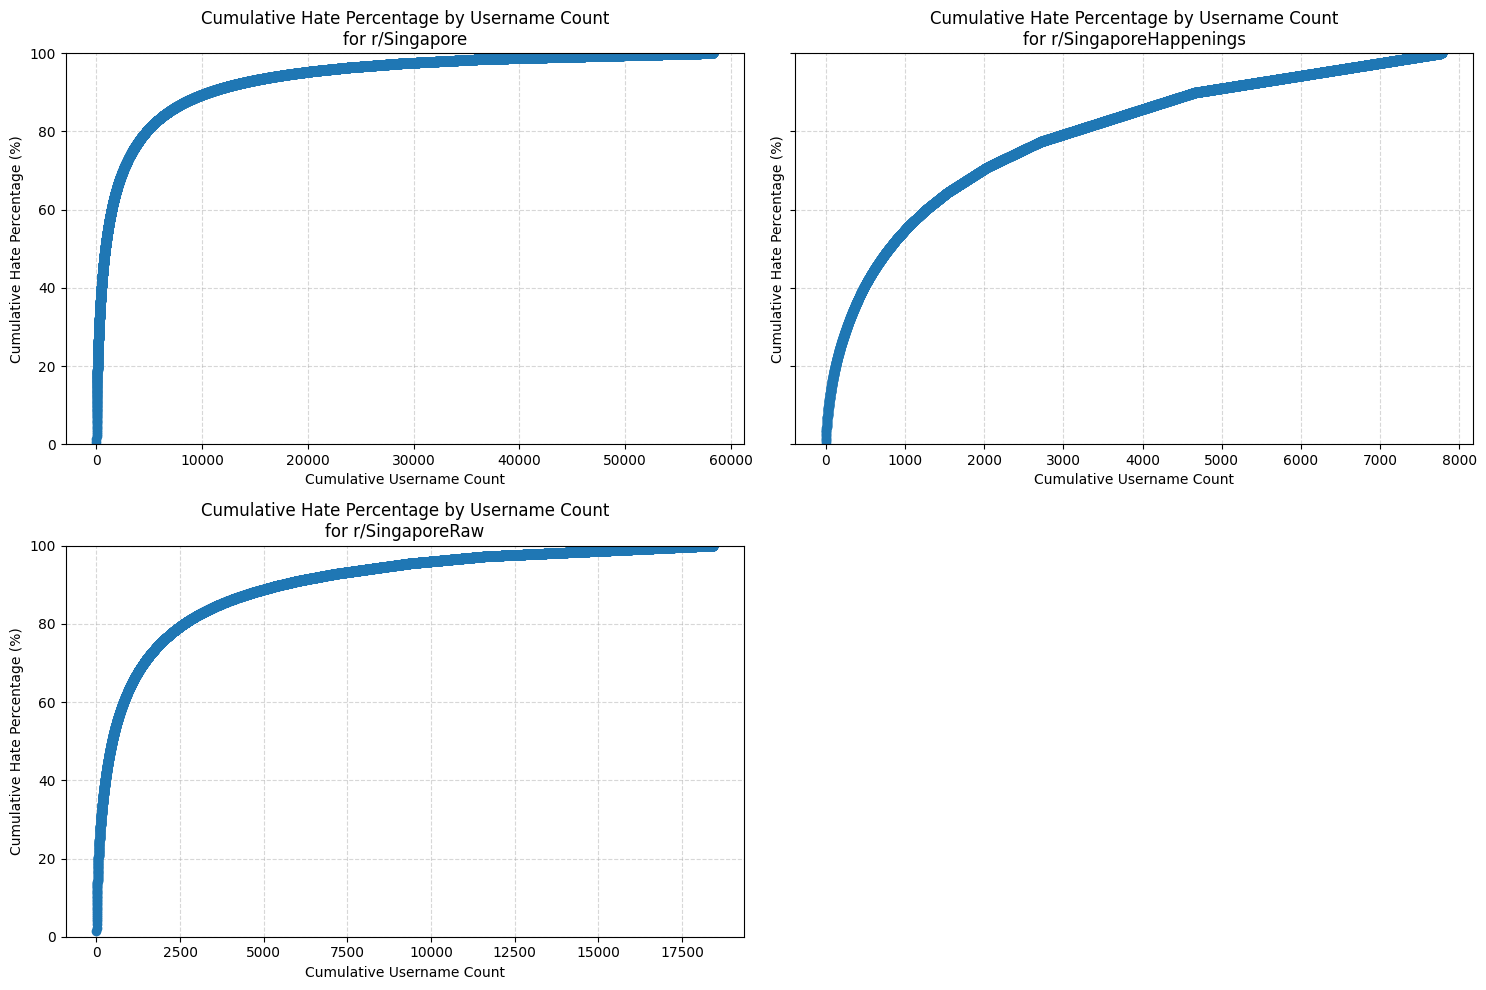

In [39]:
# Get list of unique subreddits
subreddits = top_hate_users['subreddit'].unique()

# Set up the subplots side by side with 2 plots per row
n_cols = 2  # Number of plots per row
n_rows = (len(subreddits) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, subreddit in enumerate(subreddits):
    # Filter data for the current subreddit and sort by hate_percentage in descending order
    subreddit_data = top_hate_users[top_hate_users['subreddit'] == subreddit].sort_values(by='hate_percentage', ascending=False).reset_index(drop=True)

    # Calculate cumulative hate percentage and cumulative username count
    subreddit_data['cumulative_hate_percentage'] = subreddit_data['hate_percentage'].cumsum()
    subreddit_data['cumulative_user_count'] = range(1, len(subreddit_data) + 1)

    # Plot cumulative hate percentage vs. cumulative username count with a thinner line
    axes[i].plot(subreddit_data['cumulative_user_count'], subreddit_data['cumulative_hate_percentage'], marker='o', linestyle='-', linewidth=1)
    axes[i].set_title(f"Cumulative Hate Percentage by Username Count\nfor {subreddit}")
    axes[i].set_xlabel("Cumulative Username Count")
    axes[i].set_ylabel("Cumulative Hate Percentage (%)")
    axes[i].set_ylim(0, 100)  # Scale y-axis to 100% for clarity
    axes[i].grid(True, linestyle='--', alpha=0.5)  # Add a grid for readability

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Highest upvotes

<ipython-input-63-10334e83d4b3>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



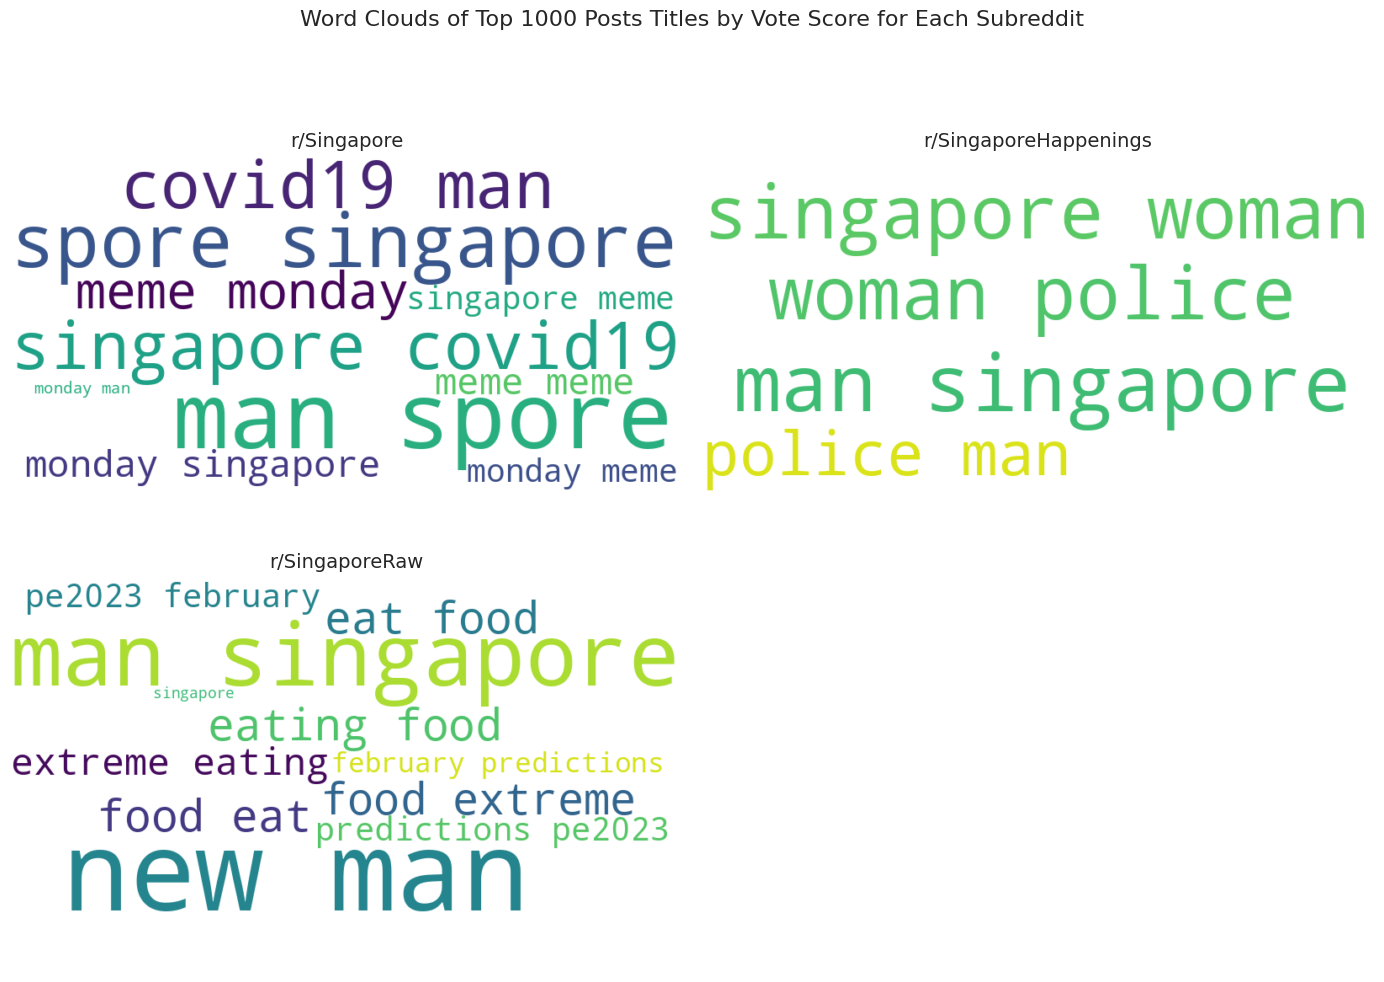

In [63]:
# Filter the top 1000 post_ids by vote_score for each subreddit
top_posts = (
    Data.groupby('subreddit')
    .apply(lambda x: x.nlargest(1000, 'vote_score'))
    .reset_index(drop=True)
)

# Get the unique subreddits
subreddits = top_posts['subreddit'].unique()

# Loop through the subreddits in chunks of 4 to plot them in a 2x2 grid
for i in range(0, len(subreddits), 4):
    subset = subreddits[i:i+4]  # Take four subreddits at a time

    # Set up a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Word Clouds of Top 1000 Posts Titles by Vote Score for Each Subreddit", fontsize=16)

    # Flatten axes for easy indexing
    axes = axes.flatten()

    for j, subreddit in enumerate(subset):
        # Filter top 1000 posts for the subreddit
        subreddit_posts = top_posts[top_posts['subreddit'] == subreddit]

        # Concatenate all post titles for the word cloud
        titles_text = ' '.join(subreddit_posts['topic_words'].dropna().tolist())

        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

        # Plot in the appropriate subplot
        axes[j].imshow(wordcloud, interpolation='bilinear')
        axes[j].axis('off')
        axes[j].set_title(f"{subreddit}", fontsize=14)

    # Turn off any unused axes if we have fewer than 4 subreddits in the last set
    for j in range(len(subset), 4):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout and leave space for the title
    plt.show()


## R/s b/w Upvote & toxic comments


A bit useless... best upvoted post is sg lofi-girl....

In [42]:
# Group by 'post_id' to calculate total comments and hate comments for each post
post_summary = Data.groupby(['post_id']).agg({
    'text': 'count',                  # Total comments per post
    'BERT_2_hate': 'sum',              # Hate comments per post
    'vote_score': 'first',             # Vote score of the post
    'post_timestamp': 'first',       # Timestamp for chronological plotting
    'subreddit': 'first'
}).rename(columns={'text': 'total_comments', 'BERT_2_hate': 'hate_comments'})

# Calculate the hate comment ratio for each post
post_summary['hate_comment_ratio'] = post_summary['hate_comments'] / post_summary['total_comments']

,total_comments,hate_comments,vote_score,post_timestamp,subreddit,hate_comment_ratio
post_id,,,,,,
1004s1o,442,143,4.0,2023-01-01 04:51:28,r/Singapore,0.323529
1005b6r,101,18,130.0,2023-01-01 09:27:03,r/Singapore,0.178218
1005xwm,13,5,0.0,2023-05-07 10:56:45,r/SingaporeRaw,0.384615
1007neb,39,18,0.0,2023-01-01 02:55:43,r/SingaporeRaw,0.461538
1008i8q,81,17,424.0,2023-01-02 00:47:21,r/Singapore,0.209877
...,...,...,...,...,...,...
zzvtms,5,1,24.0,2023-01-01 02:39:51,r/Singapore,0.200000
zzx94d,7,5,0.0,2023-01-01 14:57:22,r/SingaporeRaw,0.714286
zzxei4,35,4,674.0,2023-01-01 08:11:59,r/Singapore,0.114286


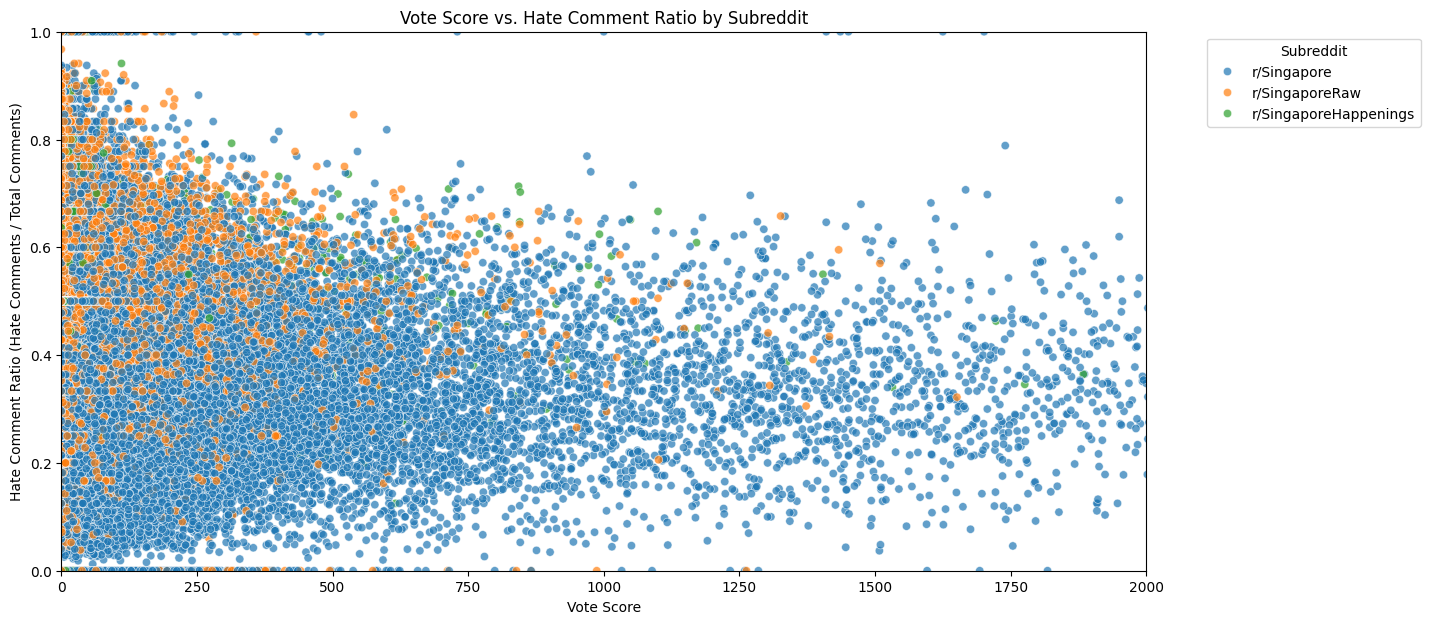

In [43]:
# Plot scatter of vote score vs hate comment ratio for each subreddit
plt.figure(figsize=(14, 7))
sns.scatterplot(data=post_summary, x='vote_score', y='hate_comment_ratio', hue='subreddit', alpha=0.7)
plt.title("Vote Score vs. Hate Comment Ratio by Subreddit")
plt.xlabel("Vote Score")
plt.ylabel("Hate Comment Ratio (Hate Comments / Total Comments)")
plt.xlim(0, 2000)
plt.ylim(0, 1)
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Toxicity in r/Singapore random discussion

In [46]:
# Filter the DataFrame for posts in subreddit r/Singapore that start with the specified phrase
filtered_data = Data[
    (Data['subreddit'] == 'r/Singapore') &
    (Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for'))
]

# Calculate total comments and hate comments for each post
hate_analysis = filtered_data.groupby('post_id').agg(
    total_comments=('text', 'count'),  # Count of comments
    hate_comments=('BERT_2_hate', 'sum')  # Sum of hate comments
).reset_index()

# Calculate hate comment percentage
hate_analysis['hate_percentage'] = (hate_analysis['hate_comments'] / hate_analysis['total_comments']) * 100

# Display the analysis
print(hate_analysis)

      post_id  total_comments  hate_comments  hate_percentage
0     1004s1o             442            143        32.352941
1     100uqui             494            146        29.554656
2     101p367             517            156        30.174081
3     102kuf2             463            145        31.317495
4     103gfmv             408            131        32.107843
...       ...             ...            ...              ...
1380   zvy5lm             536            184        34.328358
1381   zwrixw             593            200        33.726813
1382   zxmdhc             474            165        34.810127
1383   zyhu3c             442            150        33.936652
1384   zzcttb             538            147        27.323420

[1385 rows x 4 columns]
       total_comments  hate_comments  hate_percentage
count     1385.000000    1385.000000      1385.000000
mean       890.940794     292.332852        32.612332
std        406.374446     140.066209         4.294653
min          1.

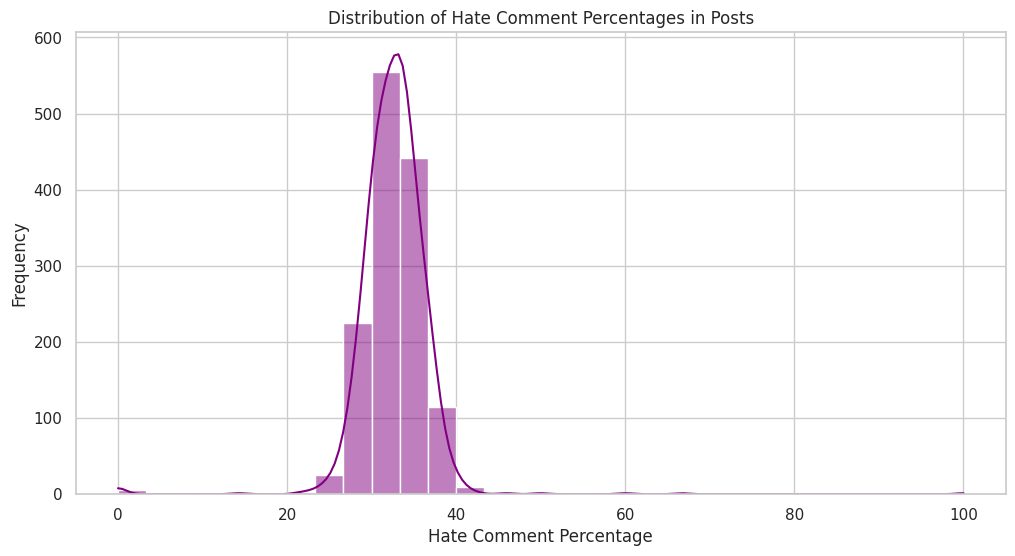

In [54]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plotting the distribution of hate comment percentages
plt.figure(figsize=(12, 6))
sns.histplot(hate_analysis['hate_percentage'], bins=30, kde=True, color='purple')

# Set axis labels and title
plt.xlabel('Hate Comment Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Hate Comment Percentages in Posts')

plt.show()


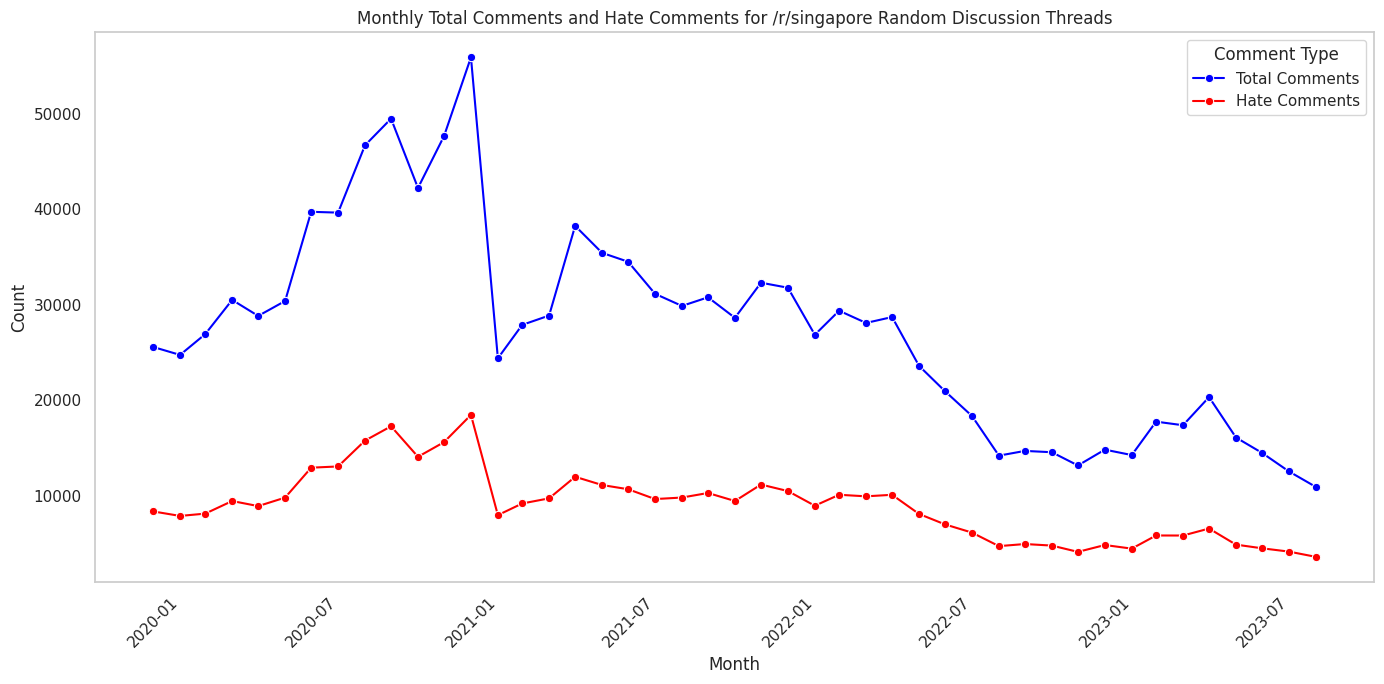

In [48]:
# Filter for relevant posts in r/Singapore
filtered_data = Data[(Data['subreddit'] == 'r/Singapore') &
                     (Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for'))]

# Create a 'month' column for aggregation
filtered_data['month'] = filtered_data['timestamp'].dt.to_period('M')

# Calculate total comments and hate comments per month
monthly_counts = filtered_data.groupby('month').agg(
    total_comments=('text', 'count'),
    hate_comments=('BERT_2_hate', 'sum')  # Sum of hate comments (True == 1)
).reset_index()

# Convert 'month' back to datetime for plotting
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

# Plot the time series
plt.figure(figsize=(14, 7))

# Plot total comments
sns.lineplot(data=monthly_counts, x='month', y='total_comments', marker='o', label='Total Comments', color='blue')

# Plot hate comments
sns.lineplot(data=monthly_counts, x='month', y='hate_comments', marker='o', label='Hate Comments', color='red')

# Format the plot
plt.title('Monthly Total Comments and Hate Comments for /r/singapore Random Discussion Threads')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title="Comment Type")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [55]:
# Filter for relevant posts in r/Singapore
filtered_data = Data[(Data['subreddit'] == 'r/Singapore') &
                     (Data['post_title'].str.startswith('/r/singapore random discussion and small questions thread for'))]

# Create a 'month' column for aggregation
filtered_data['month'] = filtered_data['timestamp'].dt.to_period('M')

# Calculate total comments and hate comments per month
monthly_counts = filtered_data.groupby('month').agg(
    total_comments=('text', 'count'),
    hate_comments=('BERT_2_hate', 'sum')  # Sum of hate comments (True == 1)
).reset_index()

# Convert 'month' back to datetime for plotting
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

# Calculate percentage of hate comments per month
monthly_counts['hate_percentage'] = (monthly_counts['hate_comments'] / monthly_counts['total_comments']) * 100

# Create an interactive plot using Plotly
fig = px.line(monthly_counts, x='month', y='hate_percentage',
              labels={'hate_percentage': 'Percentage of Hate Comments (%)'},
              title="Monthly Percentage of Hate Comments for /r/singapore Random Discussion Threads")

# Customize the hover data and add markers for better interactivity
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Percentage of Hate Comments",
)

# Display the interactive plot
fig.show()
